In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
!pip install fpdf
from fpdf import FPDF
import matplotlib.cm as cm
from math import pi

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=89ed0806ed822af9d09ead075abe6c291e54e2c87ede9e390df7e0c910ca7d62
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


In [4]:
from google.colab import files
uploaded = files.upload()

Saving CC GENERAL.csv to CC GENERAL.csv


In [5]:
df = pd.read_csv('CC GENERAL.csv')

In [6]:
print(f"Dataset shape: {df.shape}")
print("\nColumns:")
print(df.columns)
print("\nData types:")
print(df.info())
print("\nDescriptive stats:")
print(df.describe().transpose())

Dataset shape: (8950, 18)

Columns:
Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null 

In [7]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [8]:
print("Missing values before cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [9]:
# Handle missing values
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

<ipython-input-9-53327029259b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
<ipython-input-9-53327029259b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [10]:
# Remove duplicates
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()
    print(f"Removed {df.duplicated().sum()} duplicates")
else:
    print("No duplicates found")

No duplicates found


In [11]:
# Handle outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]

df = remove_outliers(df, 'PURCHASES')
df = remove_outliers(df, 'CASH_ADVANCE')

print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [12]:
df['SPENDING_RATIO'] = df['PURCHASES'] / df['CREDIT_LIMIT']
df['PAYMENT_RATIO'] = df['PAYMENTS'] / df['MINIMUM_PAYMENTS'].replace(0, 0.01)


In [13]:
df_features = df.drop(columns=['CUST_ID'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)


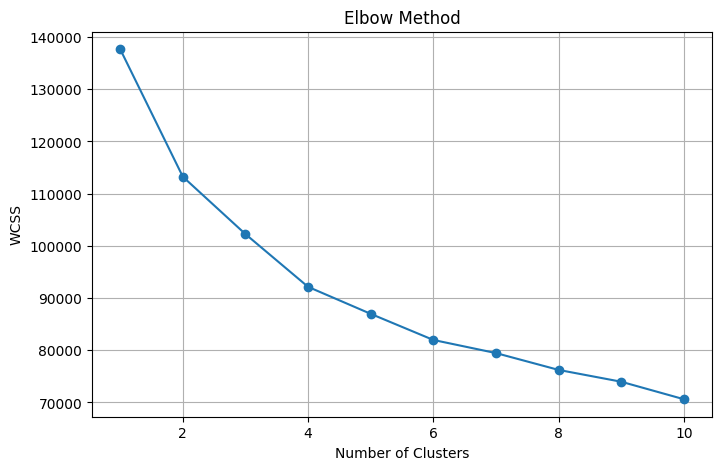

In [14]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

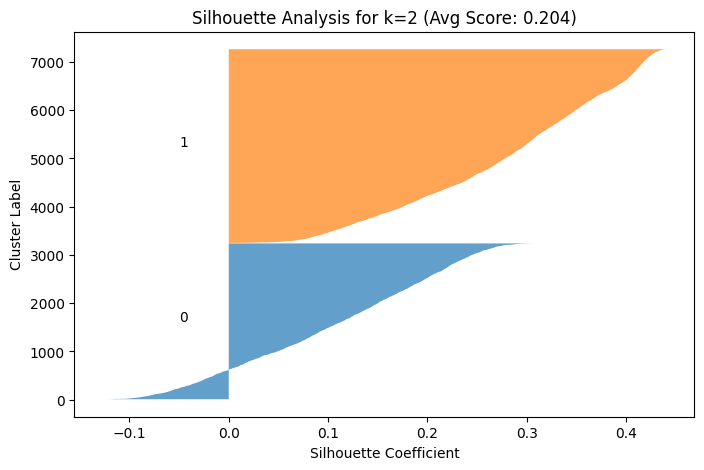

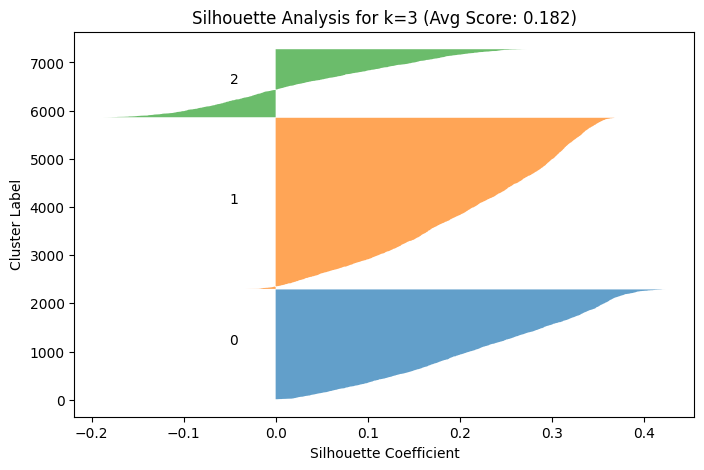

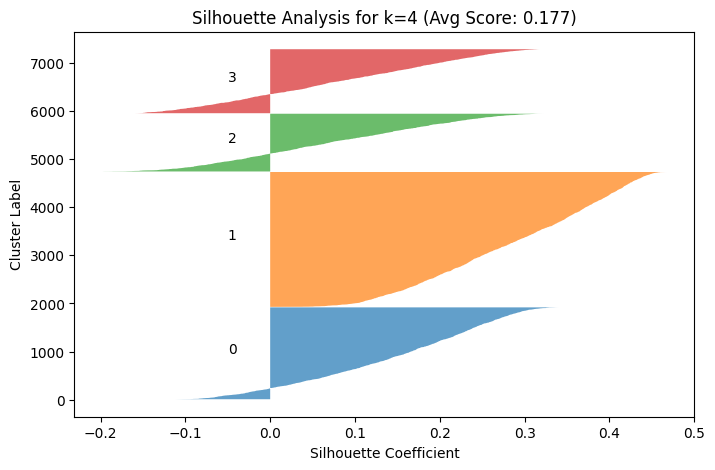

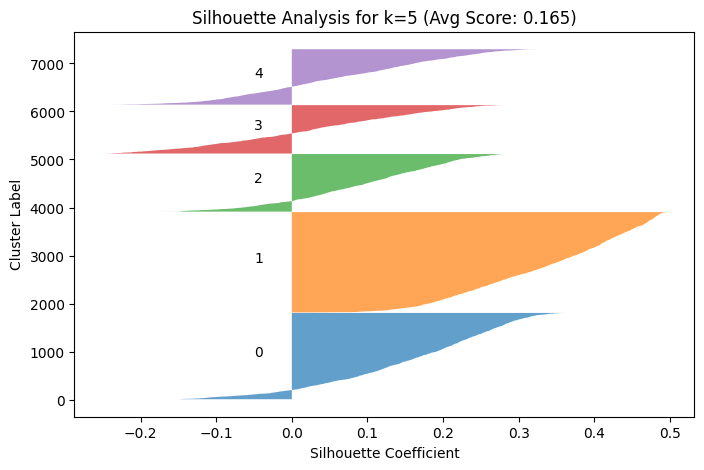


Optimal number of clusters determined: 2


In [15]:
best_k = 2
best_score = -1

for k in range(2, 6):
    fig, ax = plt.subplots(figsize=(8, 5))
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, labels)

    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_k = k

    sample_silhouette_values = silhouette_samples(scaled_features, labels)

    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        y_upper = y_lower + ith_cluster_silhouette_values.shape[0]
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * ith_cluster_silhouette_values.shape[0], str(i))
        y_lower = y_upper + 10

    ax.set_title(f"Silhouette Analysis for k={k} (Avg Score: {silhouette_avg:.3f})")
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_ylabel("Cluster Label")
    plt.show()
print(f"\nOptimal number of clusters determined: {best_k}")

In [16]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

In [17]:
cluster_profiles = df.drop(columns=['CUST_ID']).groupby('Cluster').mean()
print("\nCluster Profiles")
print(cluster_profiles.transpose())



Cluster Profiles
Cluster                                     0            1
BALANCE                            874.247790  1295.882274
BALANCE_FREQUENCY                    0.918443     0.813886
PURCHASES                         1034.038957   178.667544
ONEOFF_PURCHASES                   486.735224   123.630814
INSTALLMENTS_PURCHASES             547.650929    55.248159
CASH_ADVANCE                       162.643879   657.165794
PURCHASES_FREQUENCY                  0.840230     0.177080
ONEOFF_PURCHASES_FREQUENCY           0.276898     0.070744
PURCHASES_INSTALLMENTS_FREQUENCY     0.659269     0.101656
CASH_ADVANCE_FREQUENCY               0.039806     0.155029
CASH_ADVANCE_TRX                     0.779944     3.144209
PURCHASES_TRX                       20.108326     2.709589
CREDIT_LIMIT                      4048.716678  3453.317309
PAYMENTS                          1211.148941   936.241361
MINIMUM_PAYMENTS                   680.577802   710.803632
PRC_FULL_PAYMENT                     0

<ipython-input-18-b3494c2f34fc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='viridis')


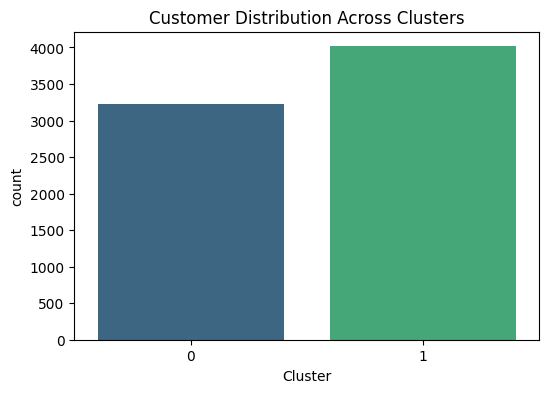

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Customer Distribution Across Clusters')
plt.show()

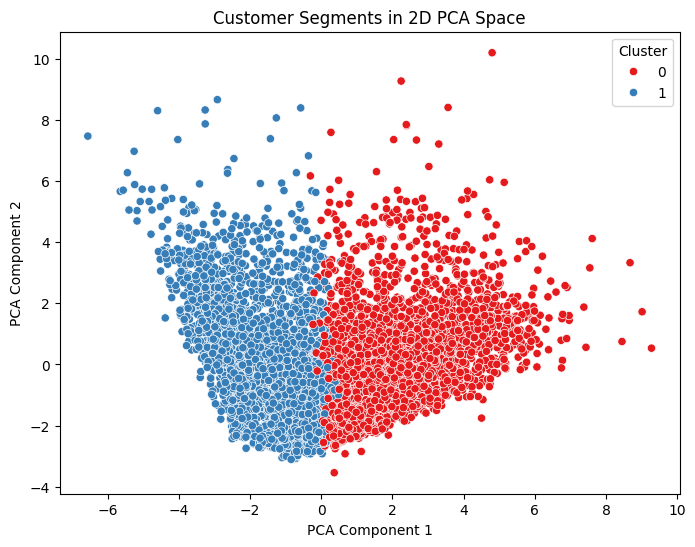

In [20]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=df['Cluster'], palette='Set1')
plt.title('Customer Segments in 2D PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


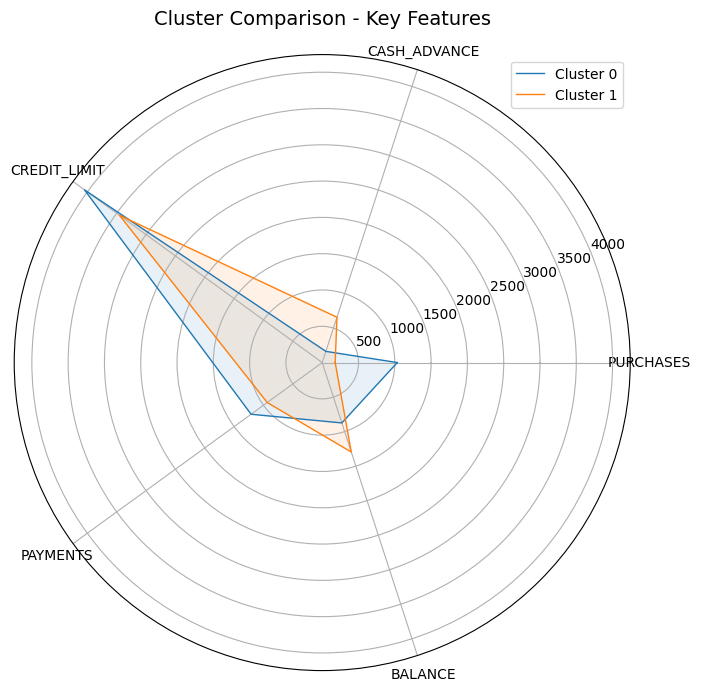

In [21]:
def plot_radar_chart(clusters, features):
    categories = features
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})

    for cluster in clusters:
        values = df[df['Cluster'] == cluster][features].mean().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, label=f'Cluster {cluster}')
        ax.fill(angles, values, alpha=0.1)

    plt.xticks(angles[:-1], categories, fontsize=10)
    ax.set_title("Cluster Comparison - Key Features\n", size=14)
    plt.legend(loc='upper right')
    plt.show()

plot_radar_chart(range(best_k), ["PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "BALANCE"])

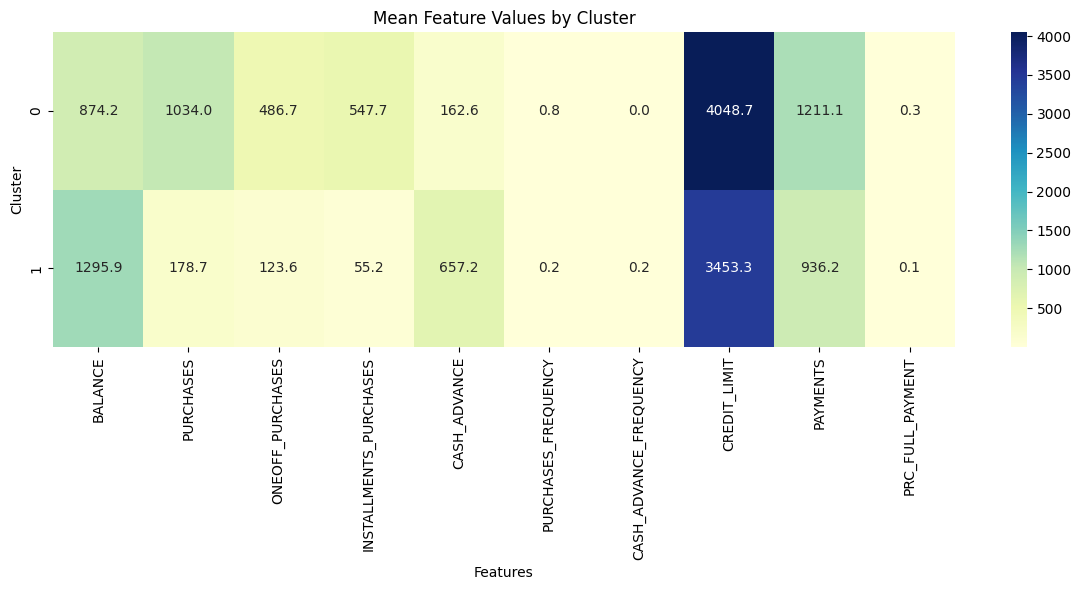

In [23]:
features = [
    'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
    'CREDIT_LIMIT', 'PAYMENTS', 'PRC_FULL_PAYMENT'
]
cluster_means = df.groupby('Cluster')[features].mean()
plt.figure(figsize=(12, 6))
sns.heatmap(cluster_means, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Mean Feature Values by Cluster")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()


In [24]:
personas = {}
for cluster in range(best_k):
    cluster_size = len(df[df['Cluster'] == cluster])
    percentage = cluster_size / len(df)

    if cluster == 0:
        personas[f"Cluster {cluster}"] = {
            "Name": "Rania",
            "Characteristics": "High credit limit, frequent purchases, pays balance in full",
            "Percentage": f"{percentage:.1%}",
            "Recommendations": "Offer travel rewards, increase credit limit, VIP services"
        }
    else:
        personas[f"Cluster {cluster}"] = {
            "Name": "Mohamed",
            "Characteristics": "Lower credit utilization, relies on cash advances, minimum payments",
            "Percentage": f"{percentage:.1%}",
            "Recommendations": "Financial education, cash advance limits, activation bonuses"
        }

print("\n Customer Personas ")
print(pd.DataFrame(personas))


 Customer Personas 
                                                         Cluster 0  \
Name                                                         Rania   
Characteristics  High credit limit, frequent purchases, pays ba...   
Percentage                                                   44.6%   
Recommendations  Offer travel rewards, increase credit limit, V...   

                                                         Cluster 1  
Name                                                       Mohamed  
Characteristics  Lower credit utilization, relies on cash advan...  
Percentage                                                   55.4%  
Recommendations  Financial education, cash advance limits, acti...  


In [25]:
# Gaussian Mixture Models
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(scaled_features)

# DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)

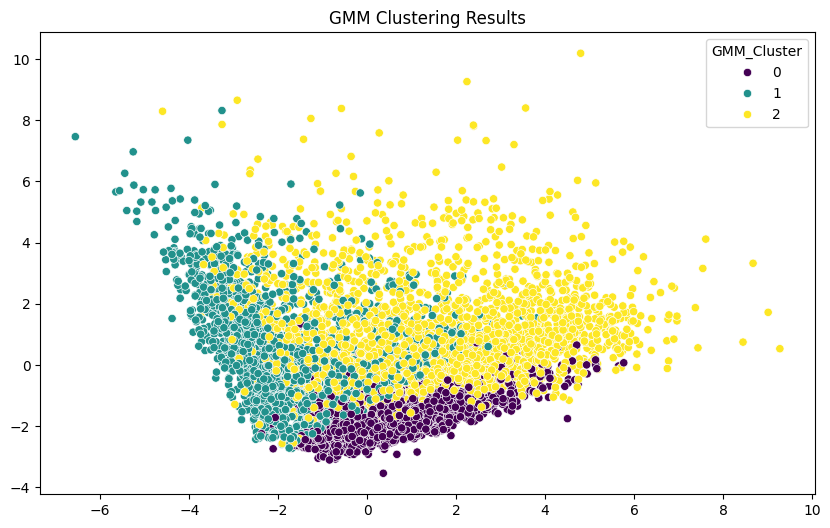

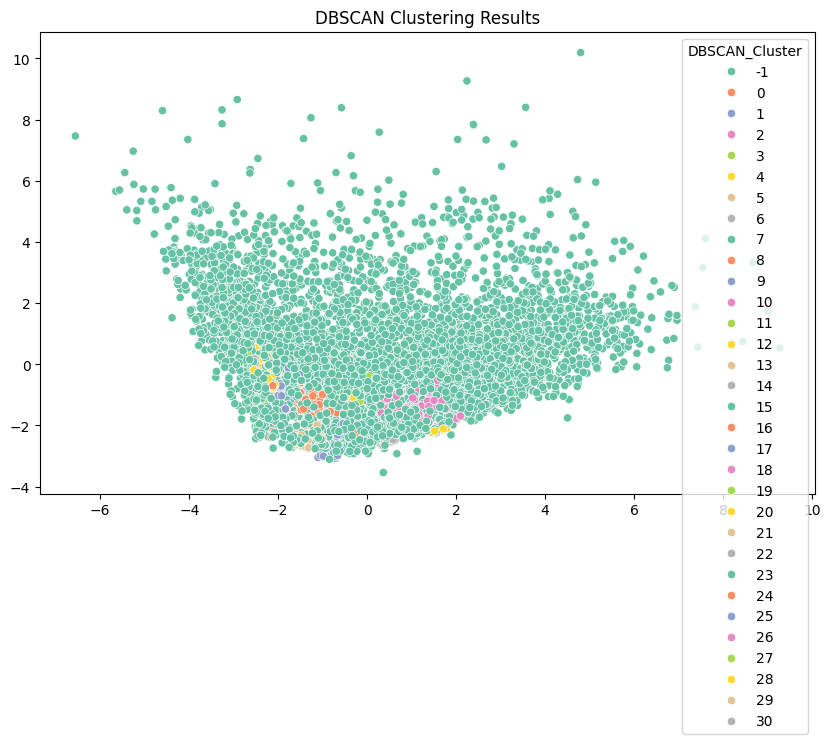

In [26]:
# Visualize GMM
plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1],
                hue=df['GMM_Cluster'], palette='viridis')
plt.title("GMM Clustering Results")
plt.show()

# Visualize DBSCAN
plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1],
                hue=df['DBSCAN_Cluster'], palette='Set2')
plt.title("DBSCAN Clustering Results")
plt.show()

<ipython-input-35-4339c517f3b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GMM_Cluster', y='CASH_ADVANCE_FREQUENCY', data=cluster_risks, palette='coolwarm')


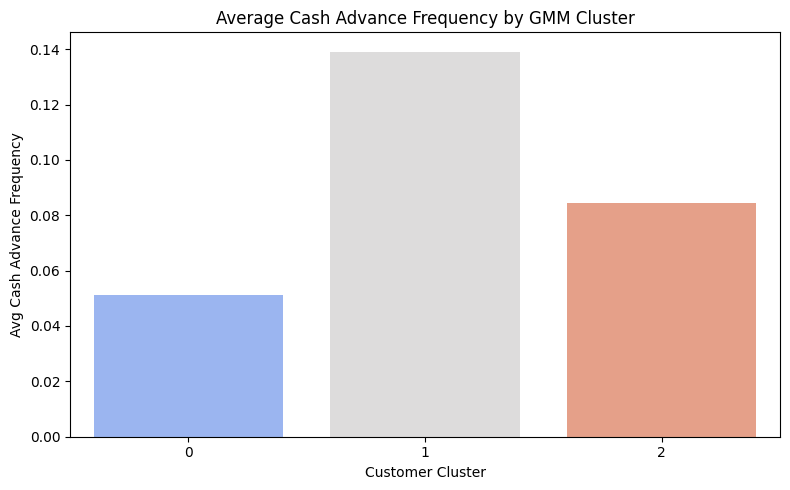

In [35]:
cluster_risks = df.groupby('GMM_Cluster')['CASH_ADVANCE_FREQUENCY'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='GMM_Cluster', y='CASH_ADVANCE_FREQUENCY', data=cluster_risks, palette='coolwarm')
plt.title('Average Cash Advance Frequency by GMM Cluster')
plt.xlabel('Customer Cluster')
plt.ylabel('Avg Cash Advance Frequency')
plt.tight_layout()
plt.show()

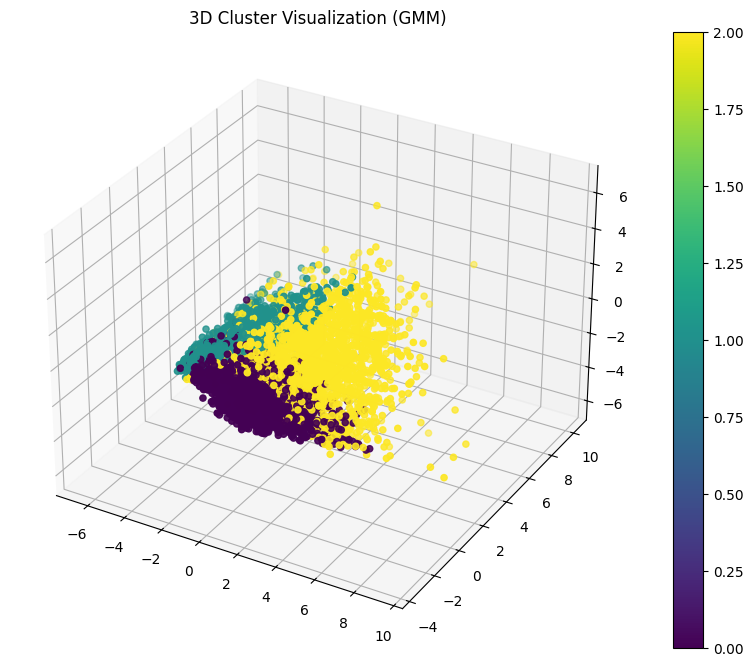

In [27]:
from mpl_toolkits.mplot3d import Axes3D

# Reduce to 3 components for 3D visualization
pca3d = PCA(n_components=3)
components_3d = pca3d.fit_transform(scaled_features)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(components_3d[:,0], components_3d[:,1], components_3d[:,2],
                    c=df['GMM_Cluster'], cmap='viridis')
plt.title("3D Cluster Visualization (GMM)")
fig.colorbar(scatter)
plt.show()

In [28]:
print("GMM Silhouette Score:", silhouette_score(scaled_features, df['GMM_Cluster']))
print("DBSCAN Silhouette Score:", silhouette_score(scaled_features, df['DBSCAN_Cluster']))
print("K-Means Silhouette Score:", silhouette_score(scaled_features, df['Cluster']))

print("\nCluster Distribution:")
print("GMM Clusters:\n", df['GMM_Cluster'].value_counts())
print("\nDBSCAN Clusters:\n", df['DBSCAN_Cluster'].value_counts())

GMM Silhouette Score: 0.09831604788988733
DBSCAN Silhouette Score: -0.3784863025932714
K-Means Silhouette Score: 0.2042426336693996

Cluster Distribution:
GMM Clusters:
 GMM_Cluster
1    2799
2    2489
0    1958
Name: count, dtype: int64

DBSCAN Clusters:
 DBSCAN_Cluster
-1     6107
 2      222
 0      200
 1      199
 5      141
 4      125
 7       50
 6       28
 3       17
 14      17
 20      11
 17      10
 12       9
 13       9
 8        8
 15       7
 16       7
 11       7
 25       6
 10       6
 9        6
 24       6
 18       5
 19       5
 27       5
 26       5
 23       5
 29       5
 30       5
 28       5
 22       4
 21       4
Name: count, dtype: int64


<Axes: >

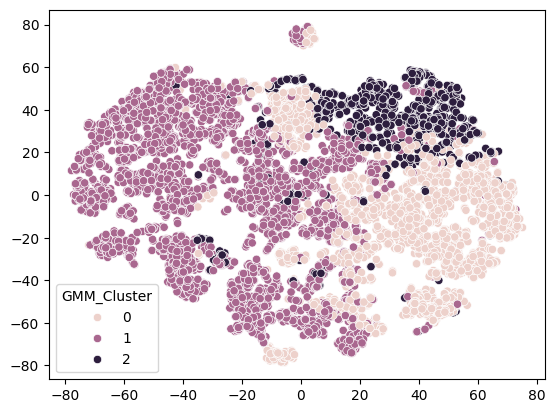

In [29]:
# Improve GMM results
gmm = GaussianMixture(n_components=3, covariance_type='tied', random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(scaled_features)

# Visualize with t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30)
tsne_results = tsne.fit_transform(scaled_features)
sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], hue=df['GMM_Cluster'])

In [30]:
# Retune DBSCAN parameters
dbscan = DBSCAN(eps=1.2, min_samples=10)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_features)

print("Improved DBSCAN distribution:\n", df['DBSCAN_Cluster'].value_counts())

Improved DBSCAN distribution:
 DBSCAN_Cluster
 0    3990
-1    3201
 1      21
 3      17
 2       9
 4       8
Name: count, dtype: int64


In [31]:
# Focus on the best performing model (K-Means)
final_clusters = df.groupby('Cluster').agg({
    'BALANCE': ['mean', 'count'],
    'PURCHASES': 'mean',
    'CREDIT_LIMIT': 'mean'
}).rename(columns={'mean': 'Avg', 'count': 'Customers'})

print("Final Cluster Profiles:")
display(final_clusters.style.background_gradient())

Final Cluster Profiles:


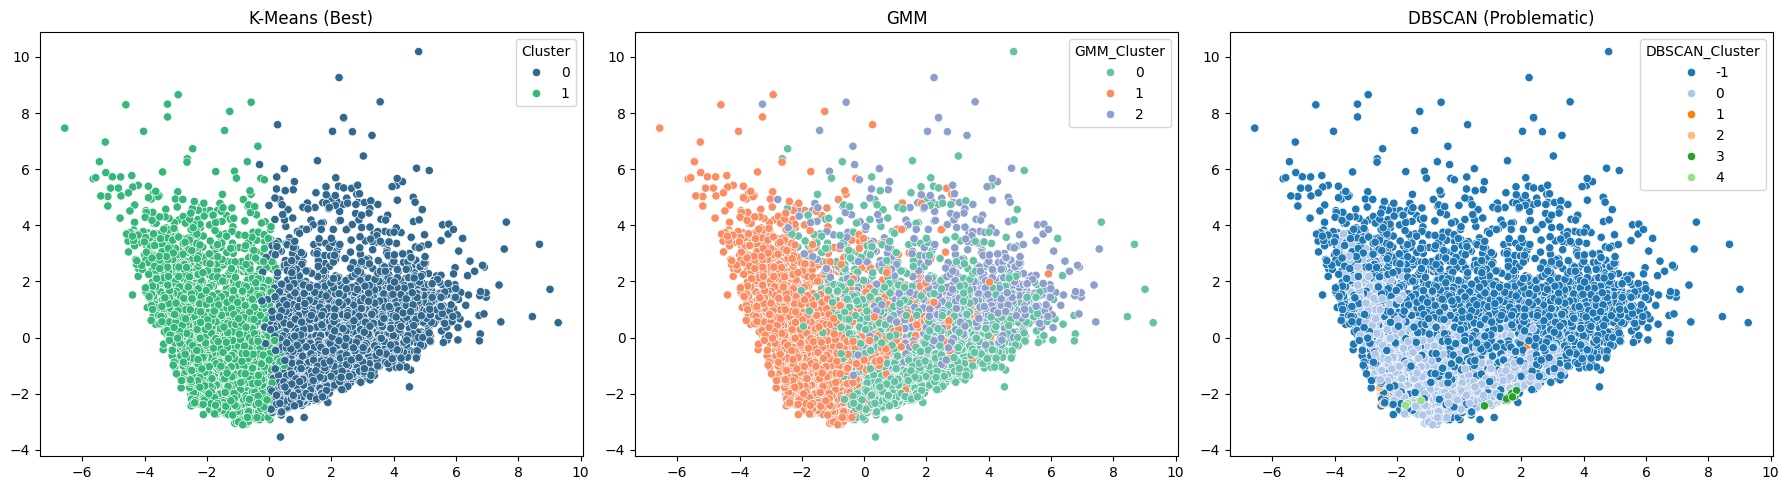

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# K-Means
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1],
                hue=df['Cluster'], palette='viridis', ax=axes[0])
axes[0].set_title('K-Means (Best)')

# GMM
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1],
                hue=df['GMM_Cluster'], palette='Set2', ax=axes[1])
axes[1].set_title('GMM')

# DBSCAN
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1],
                hue=df['DBSCAN_Cluster'], palette='tab20', ax=axes[2])
axes[2].set_title('DBSCAN (Problematic)')
plt.tight_layout()

In [33]:
# Create cluster personas
def create_personas(cluster_col):
    personas = {}
    for cluster in df[cluster_col].unique():
        cluster_data = df[df[cluster_col] == cluster]
        personas[f'Cluster {cluster}'] = {
            'Size': len(cluster_data),
            'Avg Balance': cluster_data['BALANCE'].mean(),
            'Avg Purchases': cluster_data['PURCHASES'].mean(),
            'Cash Advance Users %': (cluster_data['CASH_ADVANCE'] > 0).mean(),
            'Recommendation': get_recommendation(cluster, cluster_data)
        }
    return pd.DataFrame(personas)

def get_recommendation(cluster, data):
    if data['PURCHASES'].mean() > df['PURCHASES'].mean():
        return "Premium rewards program"
    elif data['CASH_ADVANCE'].mean() > df['CASH_ADVANCE'].mean():
        return "Financial education program"
    else:
        return "Activation campaign"

print("GMM Personas:")
display(create_personas('GMM_Cluster'))

print("\nDBSCAN Personas:")
display(create_personas('DBSCAN_Cluster'))

GMM Personas:


,Cluster 1,Cluster 2,Cluster 0
Size,3966,956,2324
Avg Balance,1237.913582,1224.099708,838.148604
Avg Purchases,259.137259,1335.182437,754.800895
Cash Advance Users %,0.592032,0.322176,0.228485
Recommendation,Financial education program,Premium rewards program,Premium rewards program



DBSCAN Personas:


,Cluster 0,Cluster -1,Cluster 2,Cluster 1,Cluster 4,Cluster 3
Size,3990,3201,9,21,8,17
Avg Balance,838.917199,1461.284444,24.489899,61.252368,12.508044,70.825887
Avg Purchases,248.583088,951.222793,0.0,623.421429,86.2475,461.032353
Cash Advance Users %,0.397494,0.497345,1.0,0.0,0.0,0.0
Recommendation,Activation campaign,Premium rewards program,Activation campaign,Premium rewards program,Activation campaign,Activation campaign


In [36]:
!pip install dash plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 17.9 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [37]:
!pip install dash jupyter-dash
from jupyter_dash import JupyterDash
from dash import dcc, html, dash_table, Input, Output, State
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import base64
import io

# Data Preparation
df_features = df.drop(columns=['CUST_ID', 'Cluster'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)
df['PCA1'] = pca_components[:,0]
df['PCA2'] = pca_components[:,1]

app = JupyterDash(__name__)

app.layout = html.Div([
    html.H1("Credit Card Customer Segmentation Dashboard", style={'textAlign': 'center'}),

    #Download Button and Filters
    html.Div([
        html.Button("Download Cluster Data", id="btn_csv"),
        dcc.Download(id="download-data"),
        dcc.Dropdown(
            id='feature-selector',
            options=[{'label': col, 'value': col} for col in df.select_dtypes(include='number').columns],
            multi=True,
            placeholder="Select features to compare",
            style={'width': '50%'}
        )
    ], style={'padding': 20, 'display': 'flex', 'justifyContent': 'space-between'}),

    # Cluster Selection
    html.Div([
        dcc.Dropdown(
            id='cluster-dropdown',
            options=[{'label': f'Cluster {i}', 'value': i} for i in sorted(df['Cluster'].unique())],
            value=0,
            style={'width': '50%', 'margin': 'auto'}
        )
    ], style={'padding': 20}),


    html.Div([
        dcc.Graph(id='cluster-scatter', style={'display': 'inline-block', 'width': '49%'}),
        dcc.Graph(id='feature-distribution', style={'display': 'inline-block', 'width': '49%'})
    ]),

    #Correlation Heatmap
    html.Div([
        html.H3("Feature Correlation Heatmap"),
        dcc.Graph(id='correlation-heatmap')
    ], style={'padding': 20}),

    # Cluster Statistics
    html.Div([
        html.H3("Cluster Statistics"),
        html.Div(id='cluster-stats')
    ], style={'padding': 20}),

    # Cluster Comparison Metrics
    html.Div([
        html.H3("Cluster Comparison Metrics"),
        dcc.Graph(id='cluster-comparison')
    ], style={'padding': 20})
])

@app.callback(
    [Output('cluster-scatter', 'figure'),
     Output('feature-distribution', 'figure'),
     Output('cluster-stats', 'children')],
    [Input('cluster-dropdown', 'value')]
)
def update_dashboard(selected_cluster):
    scatter_fig = px.scatter(
        df, x='PCA1', y='PCA2', color='Cluster',
        hover_data=['BALANCE', 'PURCHASES', 'CREDIT_LIMIT'],
        title='Customer Segments (Colored by Cluster)'
    )

    dist_fig = px.histogram(
        df[df['Cluster'] == selected_cluster],
        x=['BALANCE', 'PURCHASES'],
        barmode='overlay',
        title=f'Feature Distribution for Cluster {selected_cluster}'
    )

    stats_table = dash_table.DataTable(
        columns=[{"name": i, "id": i} for i in df.describe().columns],
        data=df[df['Cluster'] == selected_cluster].describe().reset_index().to_dict('records'),
        style_table={'overflowX': 'auto'},
        style_cell={'textAlign': 'left', 'padding': '5px'}
    )

    return scatter_fig, dist_fig, stats_table

# Callback for correlation heatmap
@app.callback(
    Output('correlation-heatmap', 'figure'),
    [Input('feature-selector', 'value')]
)
def update_heatmap(selected_features):
    if not selected_features:
        selected_features = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT']
    corr = df[selected_features].corr()
    return px.imshow(corr, text_auto=True, title="Feature Correlation Heatmap")

# Callback for cluster comparison
@app.callback(
    Output('cluster-comparison', 'figure'),
    [Input('feature-selector', 'value')]
)
def update_comparison(selected_features):
    if not selected_features:
        selected_features = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT']
    return px.box(df, x='Cluster', y=selected_features, title="Cluster Comparison")

# Callback for download button
@app.callback(
    Output("download-data", "data"),
    [Input("btn_csv", "n_clicks")],
    prevent_initial_call=True
)
def download_data(n_clicks):
    return dcc.send_data_frame(df.to_csv, "customer_segments.csv")

app.run()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.7 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/dash/dash.py:587: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>